### Load the Stroke Prediction Data

In [1]:
# Import packages
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# Import data file
# Sources of data: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
data = pd.read_csv('../Dataset/healthcare-dataset-stroke-data.csv')

In [3]:
# Head of the data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Explore the data
We can see that there is missing value in the bmi column. Let's check if there are more columns with missing values.

In [4]:
# Summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


We confirmed that the bmi column is the only column having missing values.  Let's see how much data is missing.

In [5]:
missing_count = data['bmi'].isnull().sum()
missing_percent = data['bmi'].isnull().mean() * 100
missing_count, missing_percent

(201, 3.9334637964774952)

There is a little less than 4% of the missing BMI data which is acceptable.

### Deeper look at each parameter

##### 1. The id column
The identification number of the patients are irrelevant to our analysis. We will drop this column.

In [6]:
data.drop('id', axis='columns', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


##### 2. Look at the columns with object datatype.
***2.1 The gender column***

In [7]:
# Check the unique values of gender
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Since there is only one patient with 'Other' gender type, we'll drop that row.

In [8]:
data = data[data.gender != 'Other']
data.shape

(5109, 11)

***2.2 The ever_married column***

In [9]:
# Check the unique values of ever_married
data.ever_married.value_counts()

Yes    3353
No     1756
Name: ever_married, dtype: int64

***2.3 The work_type column***

In [10]:
data.work_type.value_counts()

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

***2.4 The  column***

In [11]:
data.Residence_type.value_counts()

Urban    2596
Rural    2513
Name: Residence_type, dtype: int64

***2.5 The smoking_status column***

In [12]:
data.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

##### 3. Deal with the missing BMI data
Let's visualize the missing BMI data

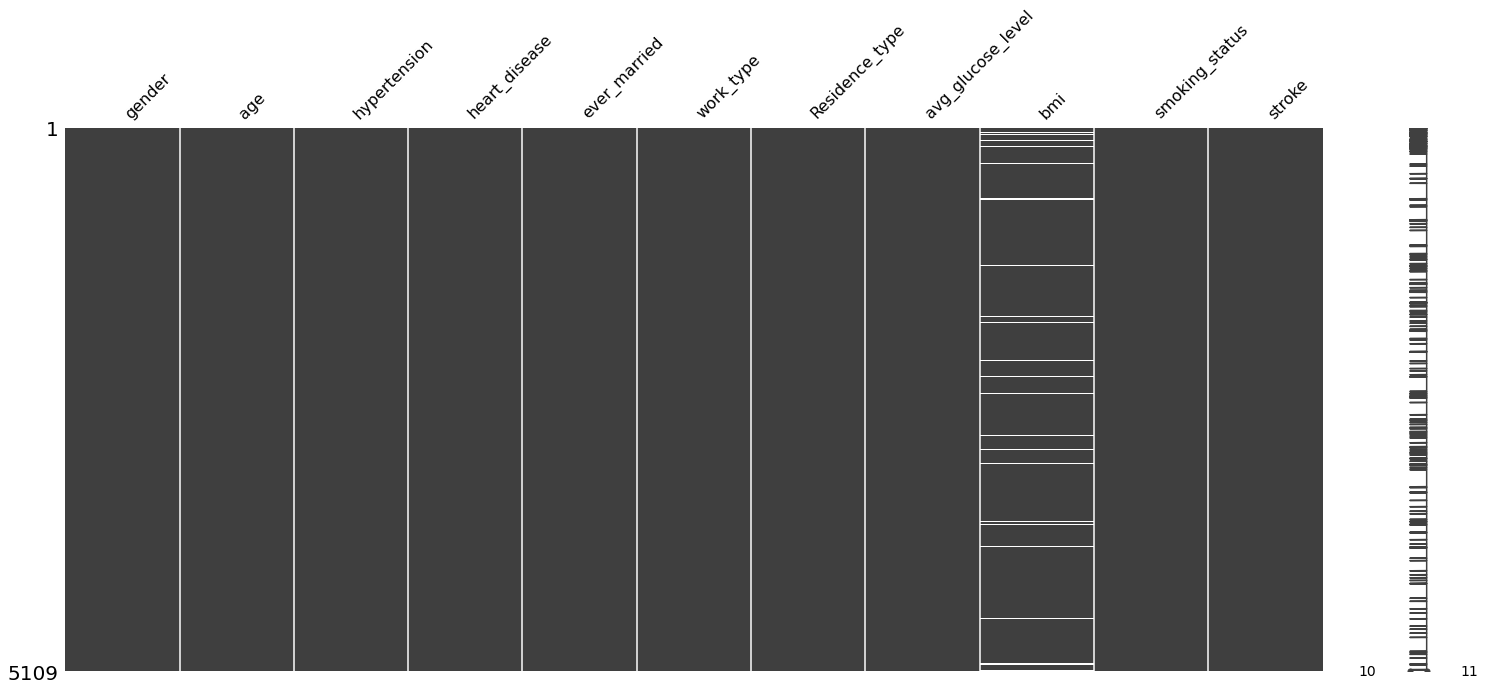

In [13]:
msno.matrix(data)
plt.show()

Looks like the missing BMI values are randomly scattered throughout the column.  Let's sort the BMI data and look at it again.
We'll first sort the data by gender and then by age.

In [14]:
data.sort_values(['gender', 'age'], inplace=True)

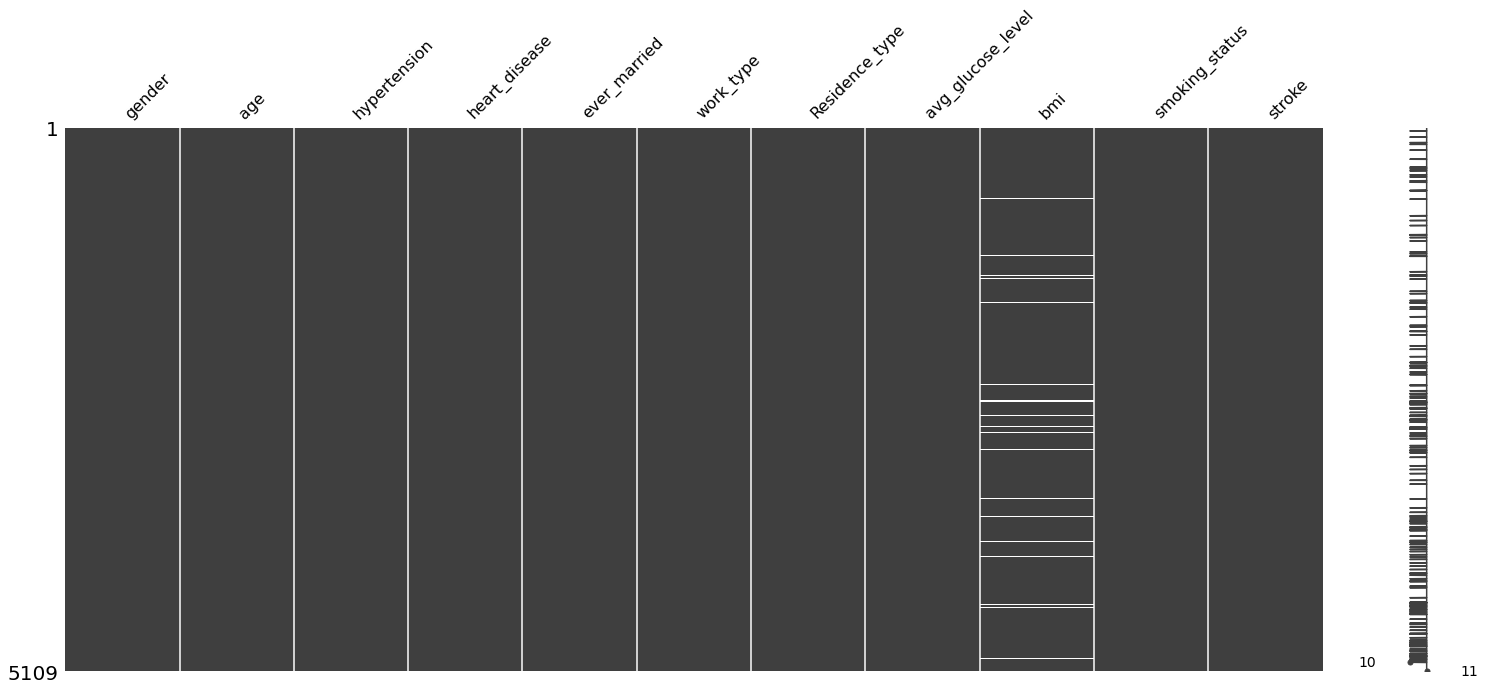

In [15]:
msno.matrix(data)
plt.show()

Looks like the missing BMI data is not related to a specific gender nor certain age.  We will forward-fill the missing data by gender and age.

In [16]:
data.reset_index(drop=True, inplace=True)
data.bmi.ffill(inplace=True)

# Look at the summary of data again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5109 entries, 0 to 5108
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.2+ KB


##### 4. Distribution of the parameters

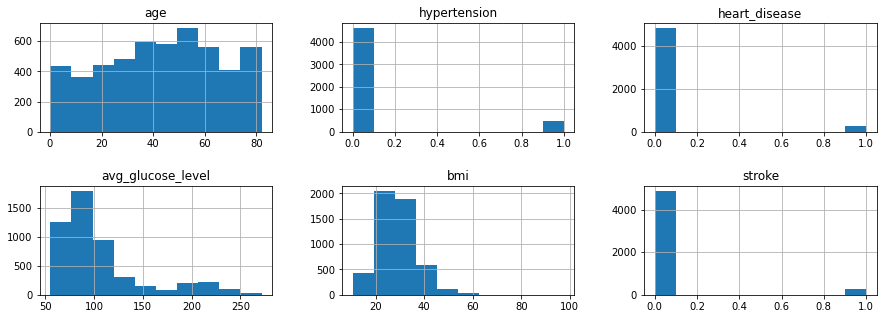

In [17]:
data.hist(figsize=(15,5), layout=(2,3))
plt.subplots_adjust(hspace=0.5);